<a href="https://colab.research.google.com/github/hshastri/Atomic-Nature/blob/master/simpleNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
import torch
import torch.nn as nn

In [334]:
import torch.nn.functional as F

In [335]:
# create a model class that inherits nn.Module
class Model(nn.Module):
  # 4 input features (in_features)

  # -> hidden layer 1 H1 (some neurons)
  # ---> hidden layer H2
  #-> output/ output+features (3 classess of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1) # fc = fully connected
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x




In [336]:
torch.manual_seed(41) # pick a manual seed for randomization

model = Model()

In [337]:
import matplotlib.pyplot as plt

In [338]:
%matplotlib inline

In [339]:
import pandas as pd

In [340]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv '
my_df = pd.read_csv(url)

In [341]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [342]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [343]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [344]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

<ipython-input-344-3d3e6cc10ae1>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


In [345]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [346]:
# train test split! set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [347]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [348]:
y

,variety
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [349]:
# covert those into numpy arrs ...because scikit learn only accpets numpy
X = X.values
y = y.values

In [350]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [351]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [352]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [353]:
from sklearn.model_selection import train_test_split

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41) # test with 20% of the data and train with the rest 80%

In [355]:
# convert x labels into tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [356]:
X_train

tensor([[5.7000, 2.6000, 3.5000, 1.0000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [5.2000, 3.5000, 1.5000, 0

In [357]:
x_test

tensor([[6.0000, 2.2000, 5.0000, 1.5000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [4.7000, 3.2000, 1.3000, 0

In [358]:
# convert y labels into tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [359]:
y_test

tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])

In [360]:
y_train

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])

In [361]:
criterion = nn.CrossEntropyLoss() #how far are predictions from the actual data
# choose adam optimizer, learning rate (lr) => if the error doesn't go down after some iterations (epocs), lower learning rate (learn slower - it'll take longer to learn)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # change weights by 0.01

In [362]:
# train model
# epoch - run through all the training data in our network
epocs = 100
losses = []
for i in range(epocs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results
  # measure the loss/error, which will be high at first
  loss = criterion(y_pred, y_train) # predicted vs y_train
  # keep track of our losses
  losses.append(loss.detach().numpy())
  # print every 10 epocs
  if i % 10 == 0:
    print(f'Epoc: {i}, loss: {loss}')
  # do back propagation: take the error rate of forward propagation
  # and feed it back through the network to "fine tune" the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
# after this our model object would have it's weights in every connected layer updated per the training

Epoc: 0, loss: 1.125203251838684
Epoc: 10, loss: 1.0097211599349976
Epoc: 20, loss: 0.8162347674369812
Epoc: 30, loss: 0.585993230342865
Epoc: 40, loss: 0.4003389775753021
Epoc: 50, loss: 0.26794716715812683
Epoc: 60, loss: 0.1796349585056305
Epoc: 70, loss: 0.12165623158216476
Epoc: 80, loss: 0.0860651507973671
Epoc: 90, loss: 0.06522614508867264


In [363]:
sample = X_train[0].unsqueeze(0)  # shape [1, 4]
h1_output = F.relu(model.fc1(sample))
h2_output = F.relu(model.fc2(h1_output))

print("H1 activations:", h1_output)
print("H2 activations:", h2_output)

H1 activations: tensor([[0.0000, 0.0000, 3.2613, 4.9038, 3.1523, 0.0000, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)
H2 activations: tensor([[0.0000, 0.0000, 0.0000, 0.8574, 0.0000, 2.9715, 3.2577, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)


In [364]:
# Pick neuron index — in your case, neuron 3 in H1
neuron_index = 3

# Get the weights and bias for that neuron
weights = model.fc1.weight[neuron_index]  # shape: [4]
bias = model.fc1.bias[neuron_index]       # scalar

print("Neuron 3 Weights:", weights)
print("Neuron 3 Bias:", bias)

# Check what input triggered it
input_sample = X_train[0]
print("Input Sample:", input_sample)

# Manually compute pre-activation output (before ReLU)
z = torch.dot(weights, input_sample) + bias
print("Pre-ReLU Output:", z)
print("Post-ReLU Output:", F.relu(z))

Neuron 3 Weights: tensor([ 0.6724, -0.2984,  0.1883,  1.0631], grad_fn=<SelectBackward0>)
Neuron 3 Bias: tensor(0.1250, grad_fn=<SelectBackward0>)
Input Sample: tensor([5.7000, 2.6000, 3.5000, 1.0000])
Pre-ReLU Output: tensor(4.9038, grad_fn=<AddBackward0>)
Post-ReLU Output: tensor(4.9038, grad_fn=<ReluBackward0>)


Text(0.5, 0, 'Epoch')

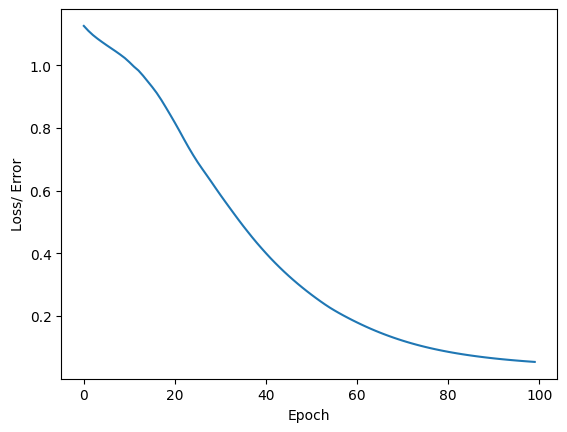

In [365]:
# graph it out
plt.plot(range(epocs), losses)
plt.ylabel("Loss/ Error")
plt.xlabel("Epoch")

In [366]:
# In plain englsh to learn something, we need to set up a nn, split up data, pick a loss function, pick an optimizer to change weights, then gotta run it through epocs.

In [367]:
# Evaluate model on test data set (validate model on test set)
with torch.no_grad(): # turn off back propagation
  y_eval = model.forward(X_test) # X_test => features from test set, y_eval => predictions
  loss = criterion(y_eval, y_test)
loss

tensor(0.1315)

In [368]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    # will tell us what type pf flower class our network thinks it is
    print(f'{i + 1} {str(y_val)} \t  Actual Test data : {y_test[i]}   \t Model prediction: {y_val.argmax().item()}')
    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'we got {correct} correct')

1 tensor([-5.8771,  4.4629,  6.5155]) 	  Actual Test data : 2   	 Model prediction: 2
2 tensor([-7.5451,  4.1668,  9.7293]) 	  Actual Test data : 2   	 Model prediction: 2
3 tensor([-8.4517,  5.1275, 10.2015]) 	  Actual Test data : 2   	 Model prediction: 2
4 tensor([-4.3411,  5.6280,  2.5636]) 	  Actual Test data : 1   	 Model prediction: 1
5 tensor([-7.1838,  4.8757,  8.3023]) 	  Actual Test data : 2   	 Model prediction: 2
6 tensor([-3.3940,  5.3421,  1.2802]) 	  Actual Test data : 1   	 Model prediction: 1
7 tensor([-5.9240,  4.9826,  6.0025]) 	  Actual Test data : 2   	 Model prediction: 2
8 tensor([-4.2895,  5.7016,  2.3920]) 	  Actual Test data : 1   	 Model prediction: 1
9 tensor([-6.5369,  4.9261,  7.1291]) 	  Actual Test data : 2   	 Model prediction: 2
10 tensor([-8.0526,  4.4129, 10.3325]) 	  Actual Test data : 2   	 Model prediction: 2
11 tensor([-5.6775,  4.9505,  5.6248]) 	  Actual Test data : 2   	 Model prediction: 2
12 tensor([ 4.5748, -2.2579, -2.8925]) 	  Actual Tes